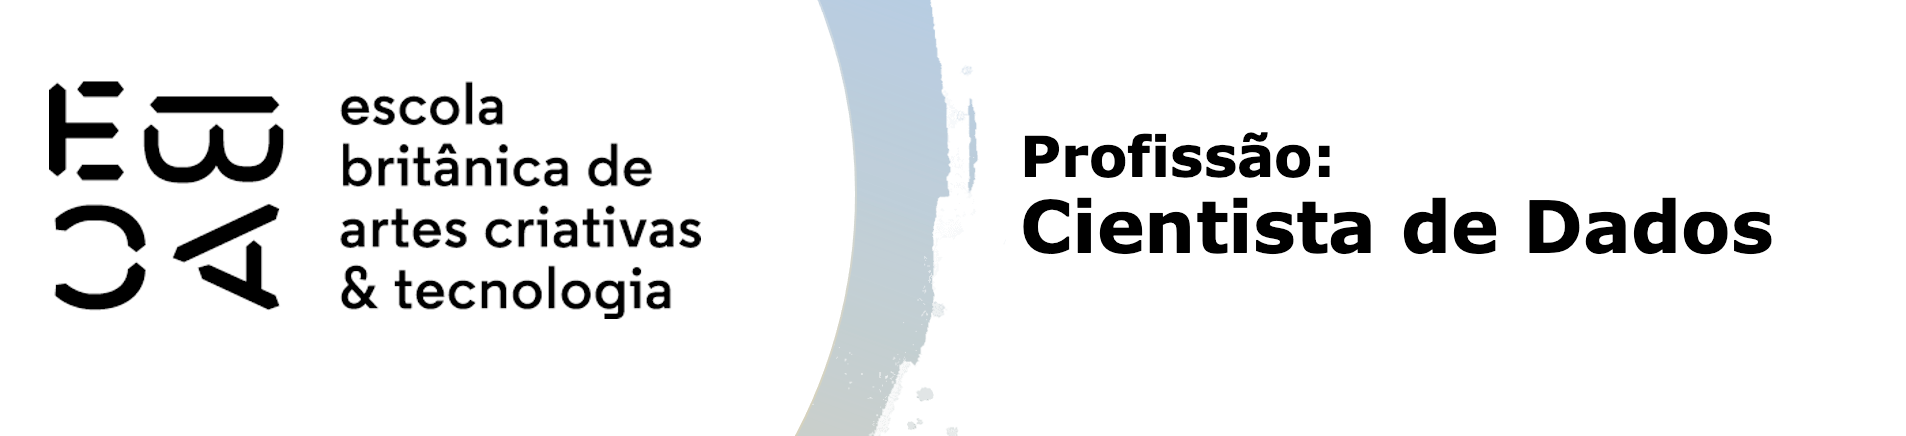

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -p numpy,pandas,matplotlib,seaborn,sklearn,tqdm

numpy     : 1.21.5
pandas    : 1.4.4
matplotlib: 3.5.2
seaborn   : 0.11.2
sklearn   : 1.0.2
tqdm      : 4.64.1



In [4]:
# Carregar dados
df = pd.read_csv('online_shoppers_intention.csv')

In [5]:
# Amostra dos dados
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
# Frequência de cada valor único na coluna 'Revenue' incluindo valores faltantes se houver
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [7]:
# Informação dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
# Número de valores únicos de cada variável
df.nunique(axis=0)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [9]:
sns.set_theme()

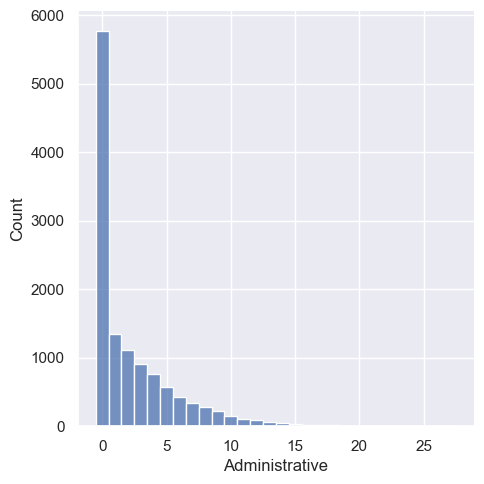

In [10]:
# Visualizando a distribuição da variável Administrative com o histograma
sns.displot(data=df, x = "Administrative", discrete=True)
plt.show()

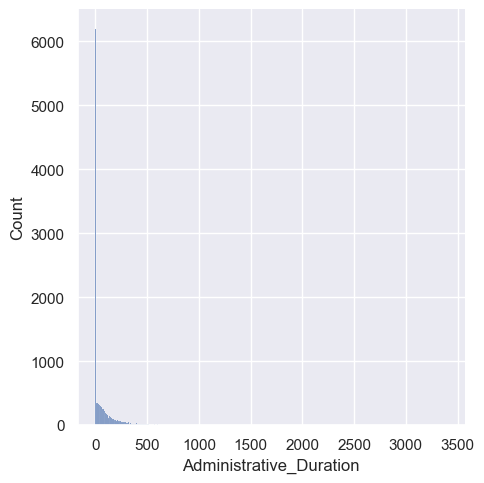

In [11]:
# Visualizando a distribuição da variável Administrative_Duration com o histograma
sns.displot(data=df, x = "Administrative_Duration")
plt.show()

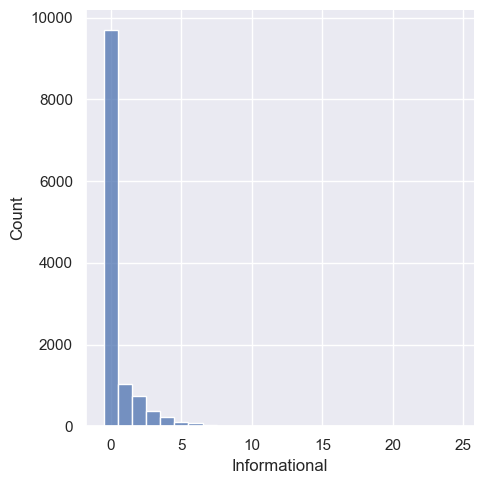

In [12]:
# Visualizando a distribuição da variável Informational com o histograma
sns.displot(data=df, x = "Informational", discrete=True)
plt.show()

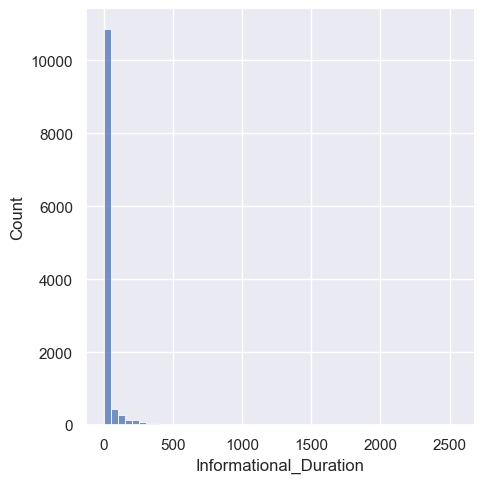

In [13]:
# Visualizando a distribuição da variável Informational_Duration com o histograma
sns.displot(data=df, x = "Informational_Duration", bins=50)
plt.show()

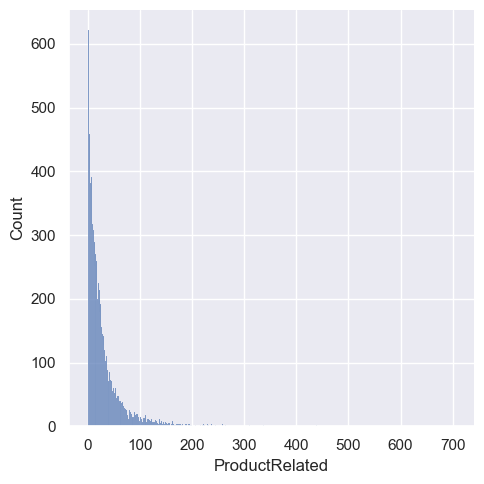

In [14]:
# Visualizando a distribuição da variável ProductRelated com o histograma
sns.displot(data=df, x = "ProductRelated", discrete=True)
plt.show()

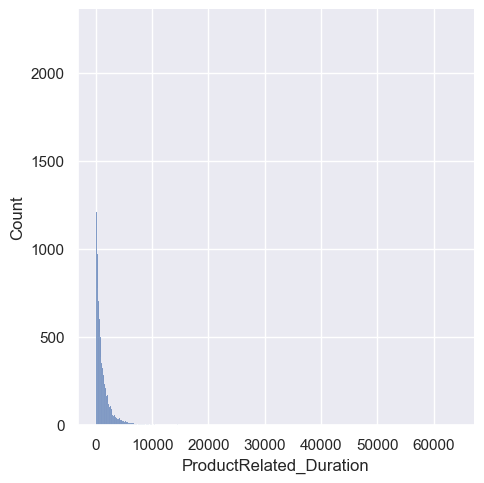

In [15]:
# Visualizando a distribuição da variável ProductRelated_Duration com o histograma
sns.displot(data=df, x = "ProductRelated_Duration")
plt.show()

In [16]:
# Verificando valores missing em cada coluna
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [17]:
# Variáveis que vão ser utilizadas
variaveis = ["Administrative", "Administrative_Duration", "Informational", 
             "Informational_Duration", "ProductRelated", "ProductRelated_Duration"]

In [18]:
# Aplicando a padronização nas variáveis
df_pad = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns = df[variaveis].columns)

In [19]:
df_pad.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430


### Elbow Method

In [20]:
SQD = []

# Número de cluster que estamos considerando
K = range(1,15)
#Laço de repetição e inserindo barra de progresso
for k in tqdm(K):
    # Fazendo um agrupamento para cada possibilidade de clusters
    km = KMeans(n_clusters=k)
    # Fazendo o fit()
    km = km.fit(df_pad)
    # Acrescentando a lista SQD. 
    # O atributo inertia_ do cluster fitado(é a soma dos quadrados das distância (SQD))
    SQD.append(km.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]

In [21]:
#Soma dos quadrados da distância
SQD

[73980.00000000003,
 51210.55819891581,
 43201.82226028566,
 37329.49123932876,
 33469.135853602435,
 29687.926639128393,
 26826.418394252574,
 24156.45760052504,
 22477.134577321503,
 21085.178300441512,
 19703.467045504367,
 18850.319464050343,
 18011.94638209778,
 17301.67802203389]

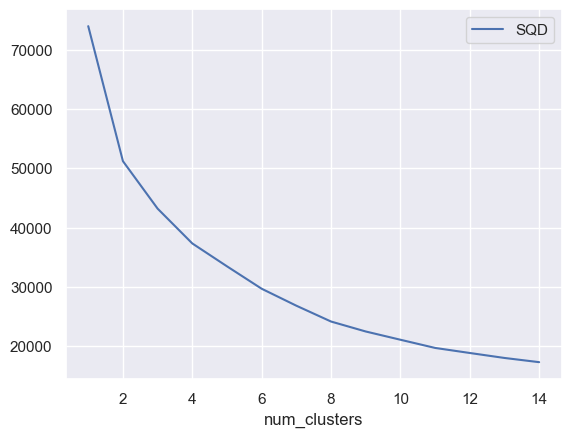

In [22]:
# Plotando gráfico num_clusters x SQD
df_graf = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df_graf.plot(x = 'num_clusters', y = 'SQD')
plt.show()

- Podemos testar com 2,3 ou 4 clusters

### Silhouette Coefficient

In [23]:
# Aplicando a padronização nas variáveis
df_pad = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns = df[variaveis].columns)

In [24]:
# Inicializar uma lista vazia que vai conter os valores da silhueta média
silhuetas = []
# Este é o número máximo de grupos que vamos testar
max_clusters = 10

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters).fit(df_pad)
    # Aqui calculamos a silhueta e guardamos o resultado na lista 'silhuetas'
    silhuetas.append(silhouette_score(df_pad, km.labels_))

  0%|          | 0/9 [00:00<?, ?it/s]

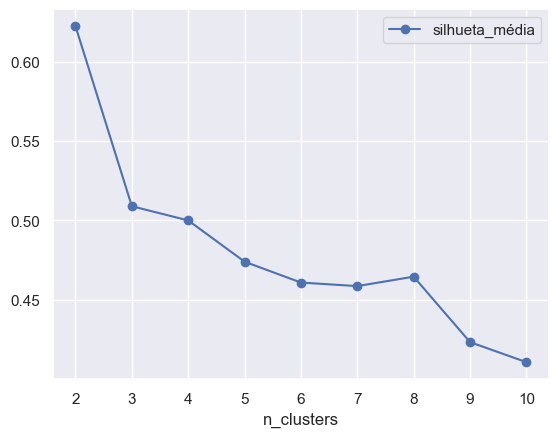

In [25]:
# Plotando os dados de silhueta média
df_silhueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silhueta_média': silhuetas})

df_silhueta.plot.line(x = 'n_clusters', y = 'silhueta_média', marker='o')
plt.show()
# plt.scatter(x = df_silhueta.n_clusters, y = df_silhueta.silhueta_média)

- Estatísticamente a melhor opção seria utilizar 2 grupos. Mas podemos testar com 3 ou 4 grupos também e analisar se está mais apropriado ao objetivo de negócio.

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

### Com 2 Clusters

In [26]:
# Aplicando padronização as variáveis
df_pad = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns = df[variaveis].columns)

# Rodando algoritmo de clusterização (KMeans) para 2 clusters
cluster_2 = KMeans(n_clusters=2)
cluster_2.fit_predict(df_pad)

# Adicionando uma coluna no dataframe df_pad com o agrupamento construido
df_pad['grupos_2'] = pd.Categorical(cluster_2.labels_)

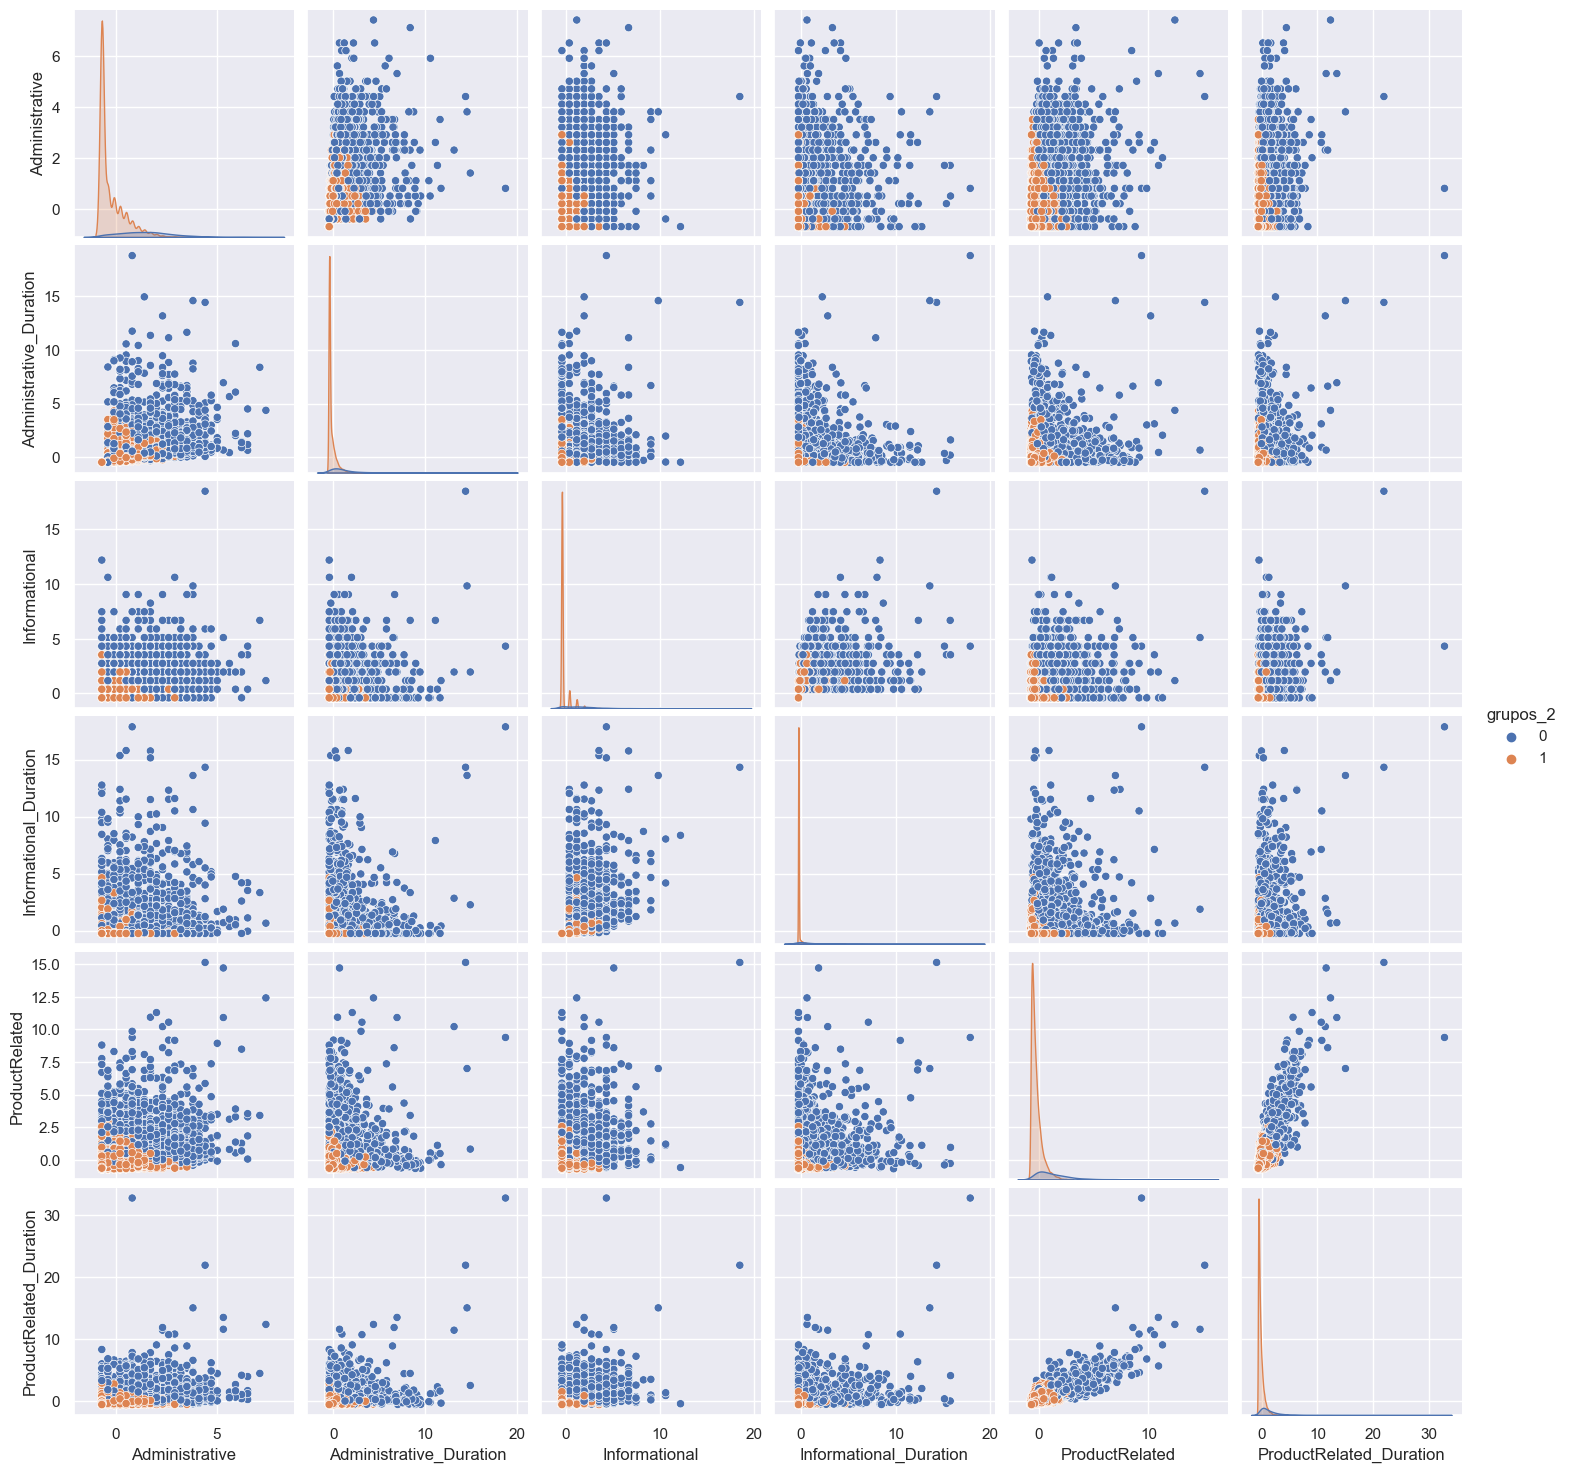

In [27]:
# Plotando resultado
sns.pairplot(df_pad, hue='grupos_2')
plt.show()

### Com 3 Clusters

In [28]:
# Aplicando padronização as variáveis
df_pad = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns = df[variaveis].columns)

# Rodando algoritmo de clusterização (KMeans) para 3 clusters
cluster_3 = KMeans(n_clusters=3)
cluster_3.fit_predict(df_pad)

# Adicionando uma coluna no dataframe df_pad com o agrupamento construido
df_pad['grupos_3'] = pd.Categorical(cluster_3.labels_)

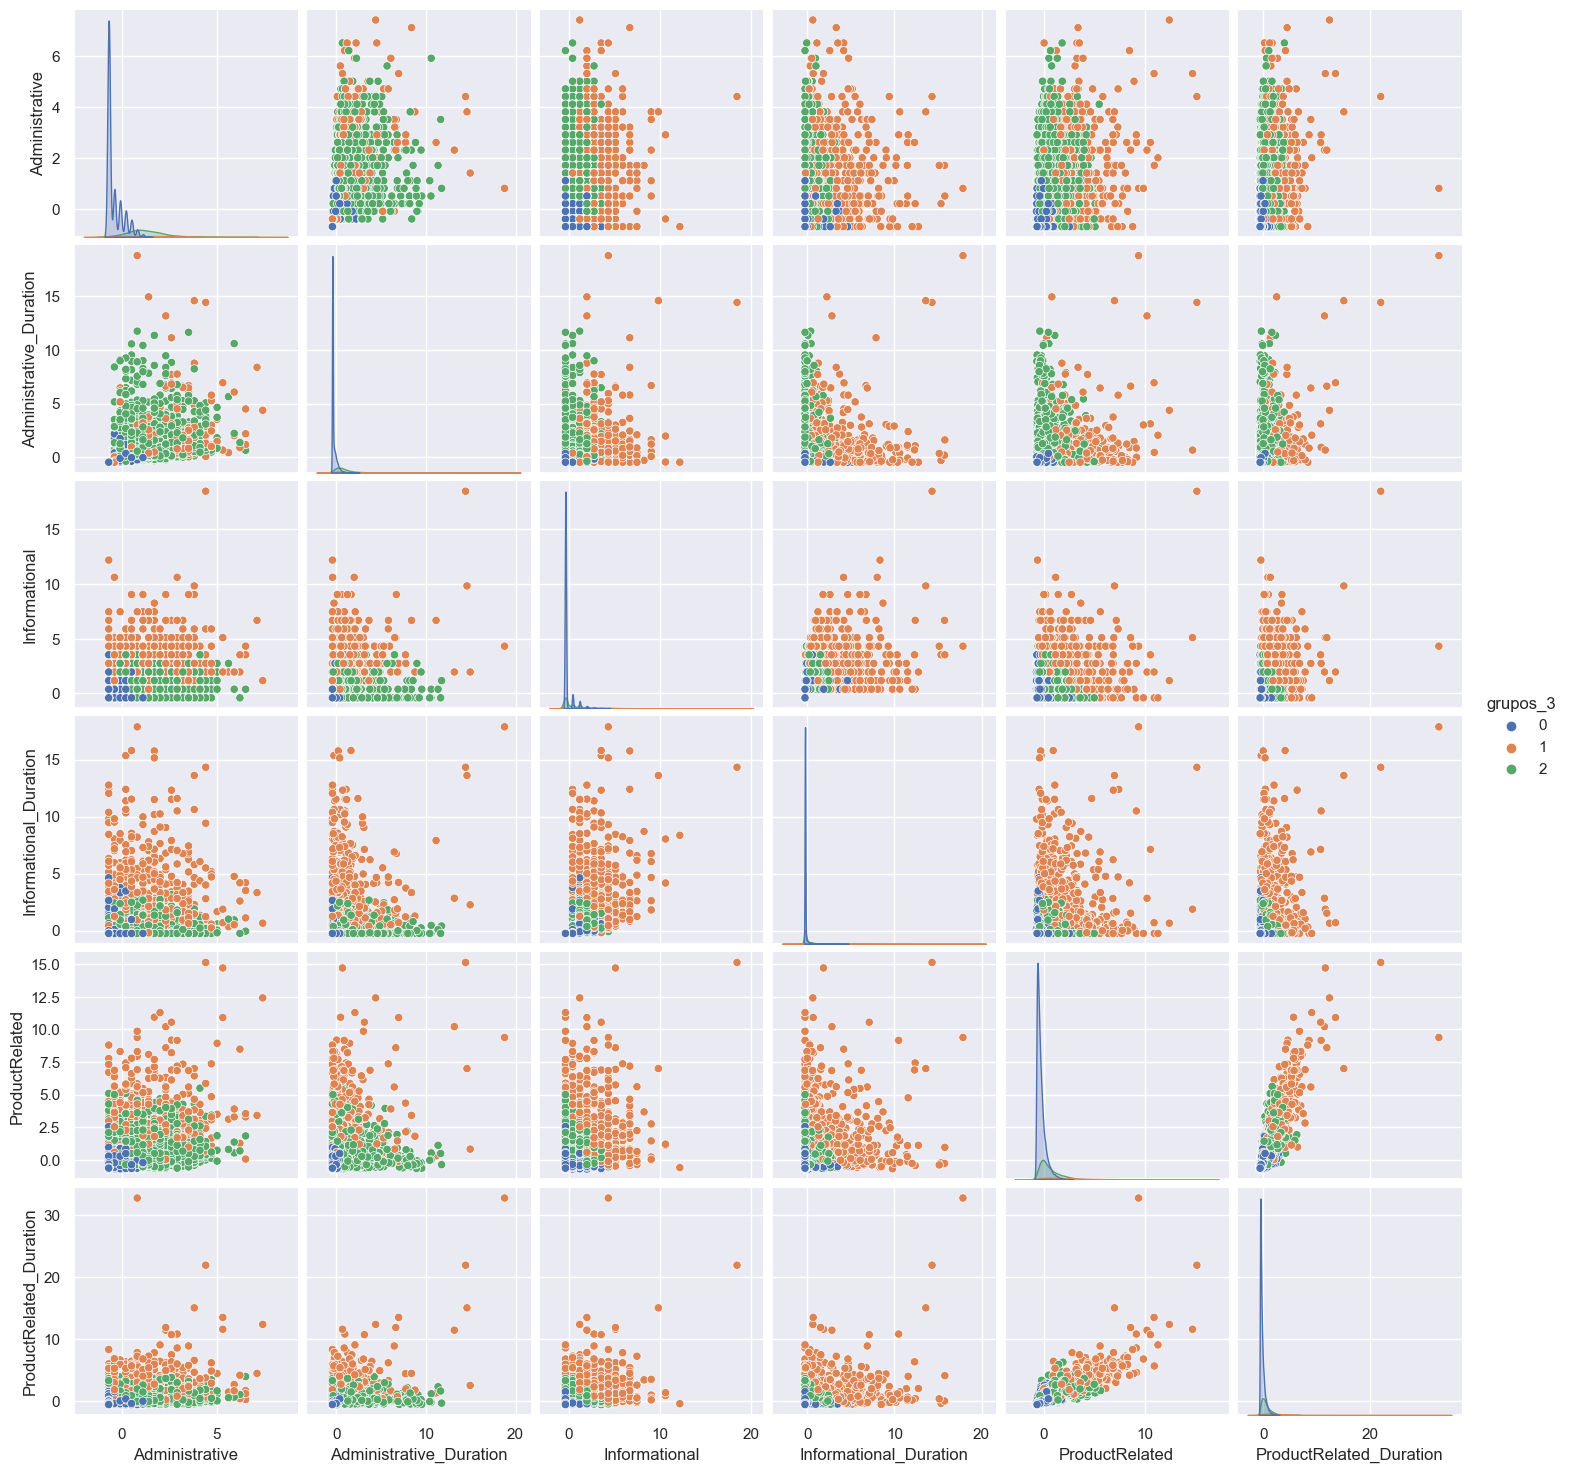

In [29]:
# Plotando resultado
sns.pairplot(df_pad, hue='grupos_3')
plt.show()

### Com 4 clusters

In [30]:
# Aplicando padronização as variáveis
df_pad = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns = df[variaveis].columns)

# Rodando algoritmo de clusterização (KMeans) para 4 clusters
cluster_4 = KMeans(n_clusters=4)
cluster_4.fit_predict(df_pad)

# Adicionando uma coluna no dataframe df_pad com o agrupamento construido
df_pad['grupos_4'] = pd.Categorical(cluster_4.labels_)

<Figure size 1500x1000 with 0 Axes>

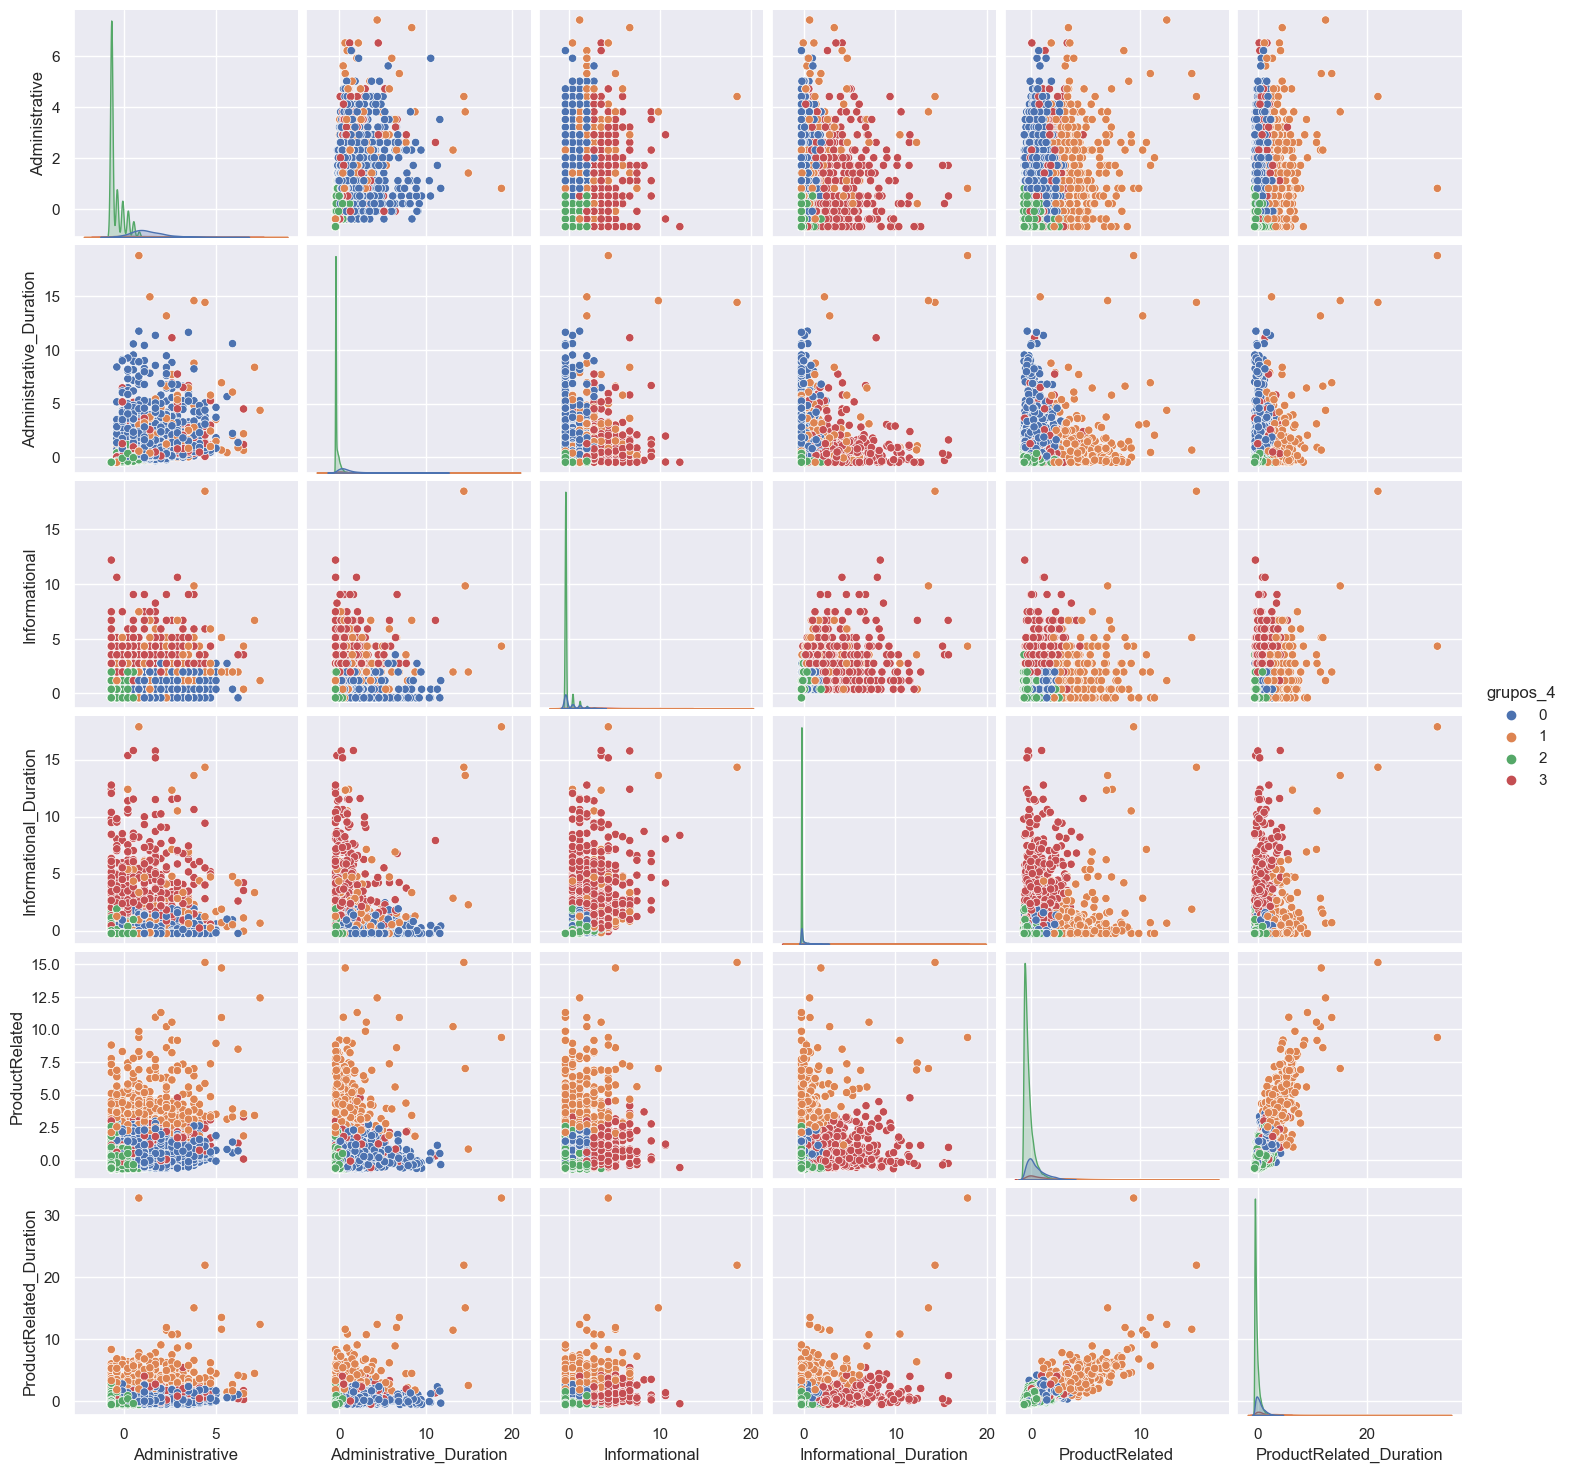

In [31]:
# Plotando resultado
plt.figure(figsize=(15, 10))
sns.pairplot(df_pad, hue='grupos_4')
plt.show()

O modelo com 4 Clusters me parece o mais apropriado.

- O grupo 1 é caracterizado por usuários que têm um número de acessos baixo ou próximo a zero e também um tempo reduzido de permanência nas páginas.
- Já o grupo 0 é composto por usuários que têm um baixo número de acessos em geral, principalmente em páginas informativas e de produtos. Esse grupo pode ser composto por perfis administrativos.
- O grupo 3 é formado por usuários que acessam frequentemente páginas informativas e têm um tempo de permanência significativo.
- Por fim, o grupo 2 é composto por usuários que acessam com frequência páginas de produtos e têm um tempo de permanência considerável nessas páginas.

In [32]:
# Renomeando grupo
df_pad['grupos_4'].replace({1:"low_access", 0:"administrative", 3:"informative", 2:"products"}, inplace=True)

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [33]:
# Acrescentando coluna BounceRates e Revenue ao DataFrame padronizado
df_pad['BounceRates'] = df['BounceRates']
df_pad['Revenue'] = df['Revenue']

In [34]:
# Plotando a variável BounceRates em relação ao grupo 4
sns.boxplot(data=df_pad, y='grupos_4', x='BounceRates')

<AxesSubplot:xlabel='BounceRates', ylabel='grupos_4'>

In [35]:
# Tabela cruzada entre Revenue e grupos_4
pd.crosstab(df_pad.Revenue, df_pad.grupos_4)

grupos_4,administrative,low_access,products,informative
Revenue,,,,
False,1760,227,8028,407
True,515,109,1135,149


In [36]:
# Porcentagem de True e False
pd.crosstab(df_pad.Revenue, df_pad.grupos_4, normalize='columns')

grupos_4,administrative,low_access,products,informative
Revenue,,,,
False,0.773626,0.675595,0.876132,0.732014
True,0.226374,0.324405,0.123868,0.267986


- O conjunto de consumidores com maior probabilidade de realizar compras é o grupo 2, intitulado de "produtos", o qual apresenta uma proporção mais elevada de compras em relação aos demais grupos e exibe taxas menores de rejeição de visitas ("Bounce Rate").